In [45]:
from pathlib import Path 
from collections import defaultdict
import pandas as pd 
import matplotlib.pyplot as plt
import networkx as nx
import pickle

## 4.Upoređivanje rezultata po sezonama

Nakon što smo odredili sve bitne stavke za glavni graf, možemo preći na specifične izmene koje su se dešavale tokom prelaza iz sezone u sezonu.

Kao i malopre prvo moramo da učitamo csv fajl kao i da grafiku damo čvorove i ivice.

In [46]:
data = pd.read_csv('brba.csv')
data.head()

,First Characters Name,Second Characters Name,Season,Episode
0,Walter White,Jesse Pinkman,Season 1,Episode 1
1,Walter White,Skyler White,Season 1,Episode 1
2,Walter White,Walt JR,Season 1,Episode 1
3,Skyler White,Walt JR,Season 1,Episode 1
4,Walter White,Walt JR,Season 1,Episode 1


In [47]:
def create_graph(df_subset):
    G = nx.Graph()
    
    characters = pd.unique(df_subset[['First Characters Name', 'Second Characters Name']].values.ravel())
    G.add_nodes_from(characters)
    
    for _, row in df_subset.iterrows():
        c1 = row['First Characters Name']
        c2 = row['Second Characters Name']
        if G.has_edge(c1, c2):
            G[c1][c2]['weight'] += 1
        else:
            G.add_edge(c1, c2, weight=1)
    return G

df_sezona_1 = data[data['Season'] == "Season 1"]
G_sezona_1 = create_graph(df_sezona_1)

Nakon što smo namestili podatke napravivši funkciju koja uzima podatke koje ćemo vaditi za svaku sezonu posebno, nraparvićemo i funkciju koja će nacrtati grafik sličan starom samo što je sadržati sezonske podatke.

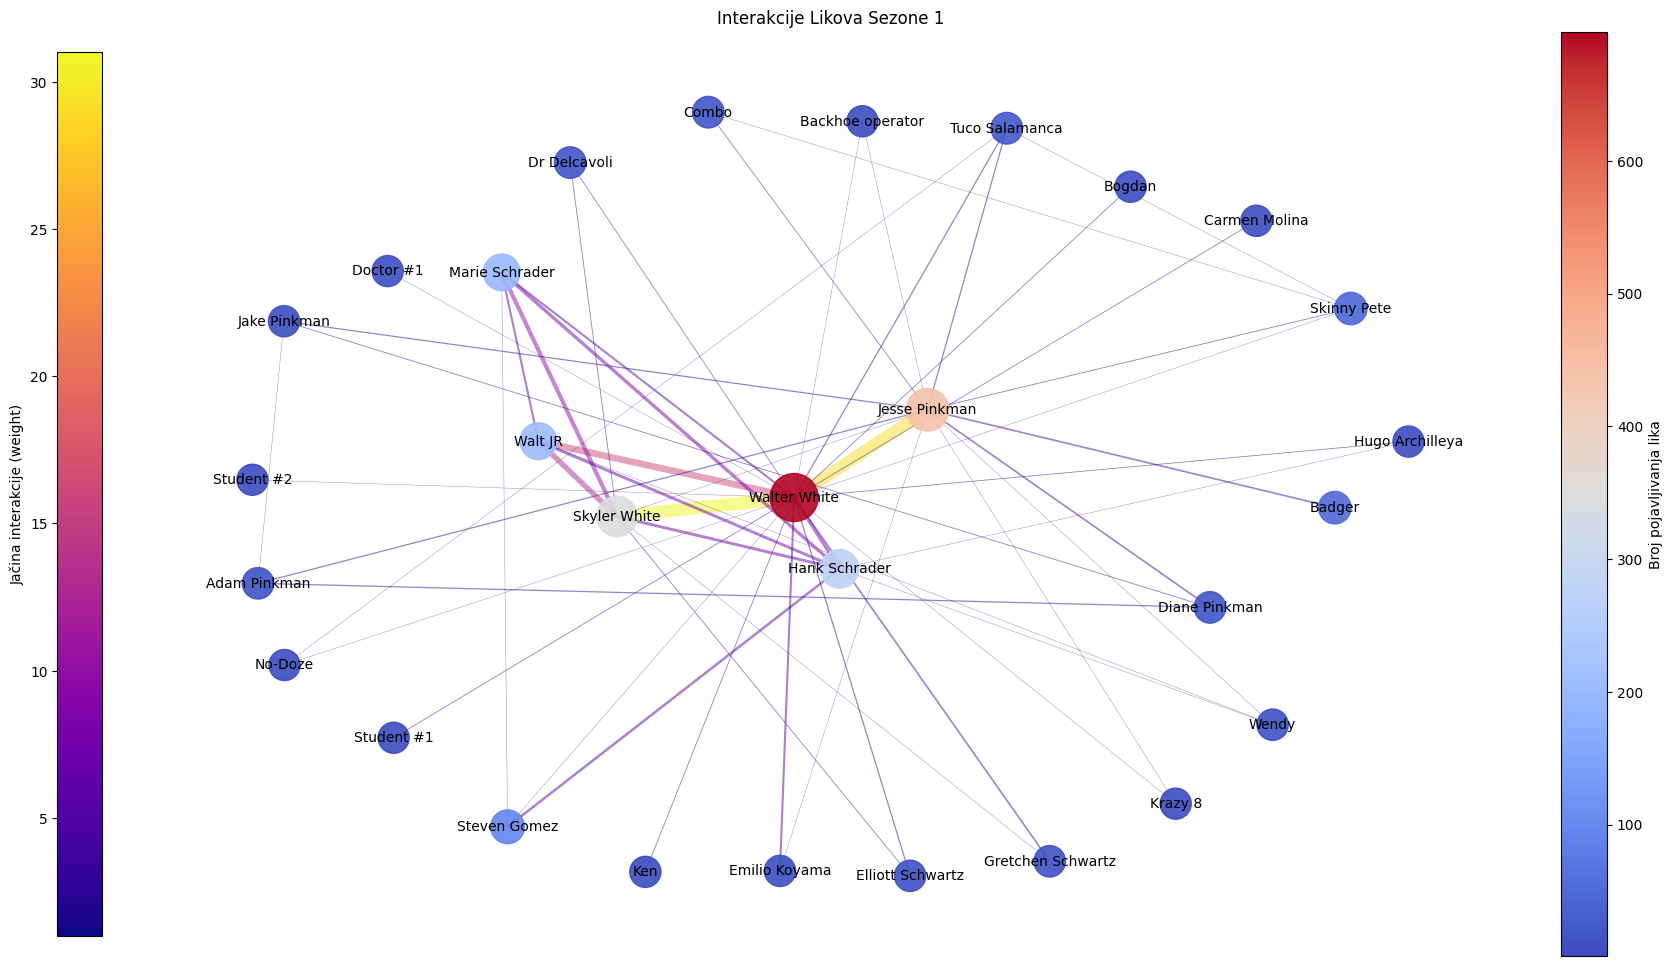

In [102]:
def plot_interactions(G, title):

    broj_pojavljivanja = {}
    for lik in G.nodes():
        count = (data['First Characters Name'] == lik).sum() + (data['Second Characters Name'] == lik).sum()
        broj_pojavljivanja[lik] = count

    node_sizes = [broj_pojavljivanja[lik] + 500 for lik in G.nodes()]
    node_colors = [broj_pojavljivanja[lik] for lik in G.nodes()]

    edges = G.edges(data=True)
    edge_weights = [d['weight'] for (_,_,d) in edges]
    edge_widths = [w*0.3 for w in edge_weights]

    plt.figure(figsize=(20,12))
    ax = plt.gca()

    pos = nx.spring_layout(G, k=5, iterations=100, weight='weight', seed=42)

    nx.draw_networkx_nodes(G, pos,node_size=node_sizes,node_color=node_colors,cmap=plt.cm.coolwarm,alpha=0.9)

    nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.5, edge_color=edge_weights, edge_cmap=plt.cm.plasma)

    nx.draw_networkx_labels(G, pos,font_size=10,font_family='sans-serif')

    sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, 
                           norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label="Broj pojavljivanja lika", fraction=0.03, pad=0.02)

    sm_edges = plt.cm.ScalarMappable(cmap=plt.cm.plasma, 
                                 norm=plt.Normalize(vmin=min(edge_weights), vmax=max(edge_weights)))
    sm_edges.set_array([])
    plt.colorbar(sm_edges, ax=ax, label="Jačina interakcije (weight)", location='left', fraction=0.03, pad=0.02)

    plt.title(title)
    plt.axis('off')
    plt.show()

plot_interactions(G_sezona_1, "Interakcije Likova Sezone 1")

Na grafiku za prvu sezonu vidimo uobičajene aktere koji se najviše pojavljuju, Waltera, Jesse-a, Skyler, Hanka, JR-a i Marie.

U ovom delu priče ostali likovi osim glavne porodice i Jesse-a nisu relevantni, pa tako i važniji sporedni likovi poput Steve Gomeza, Skinny Pete-a i Badgera nemaju puno scena.

U poređenju sa svakom ostalom sezonom, ovde je najveća veza između Waltera i Skyler.

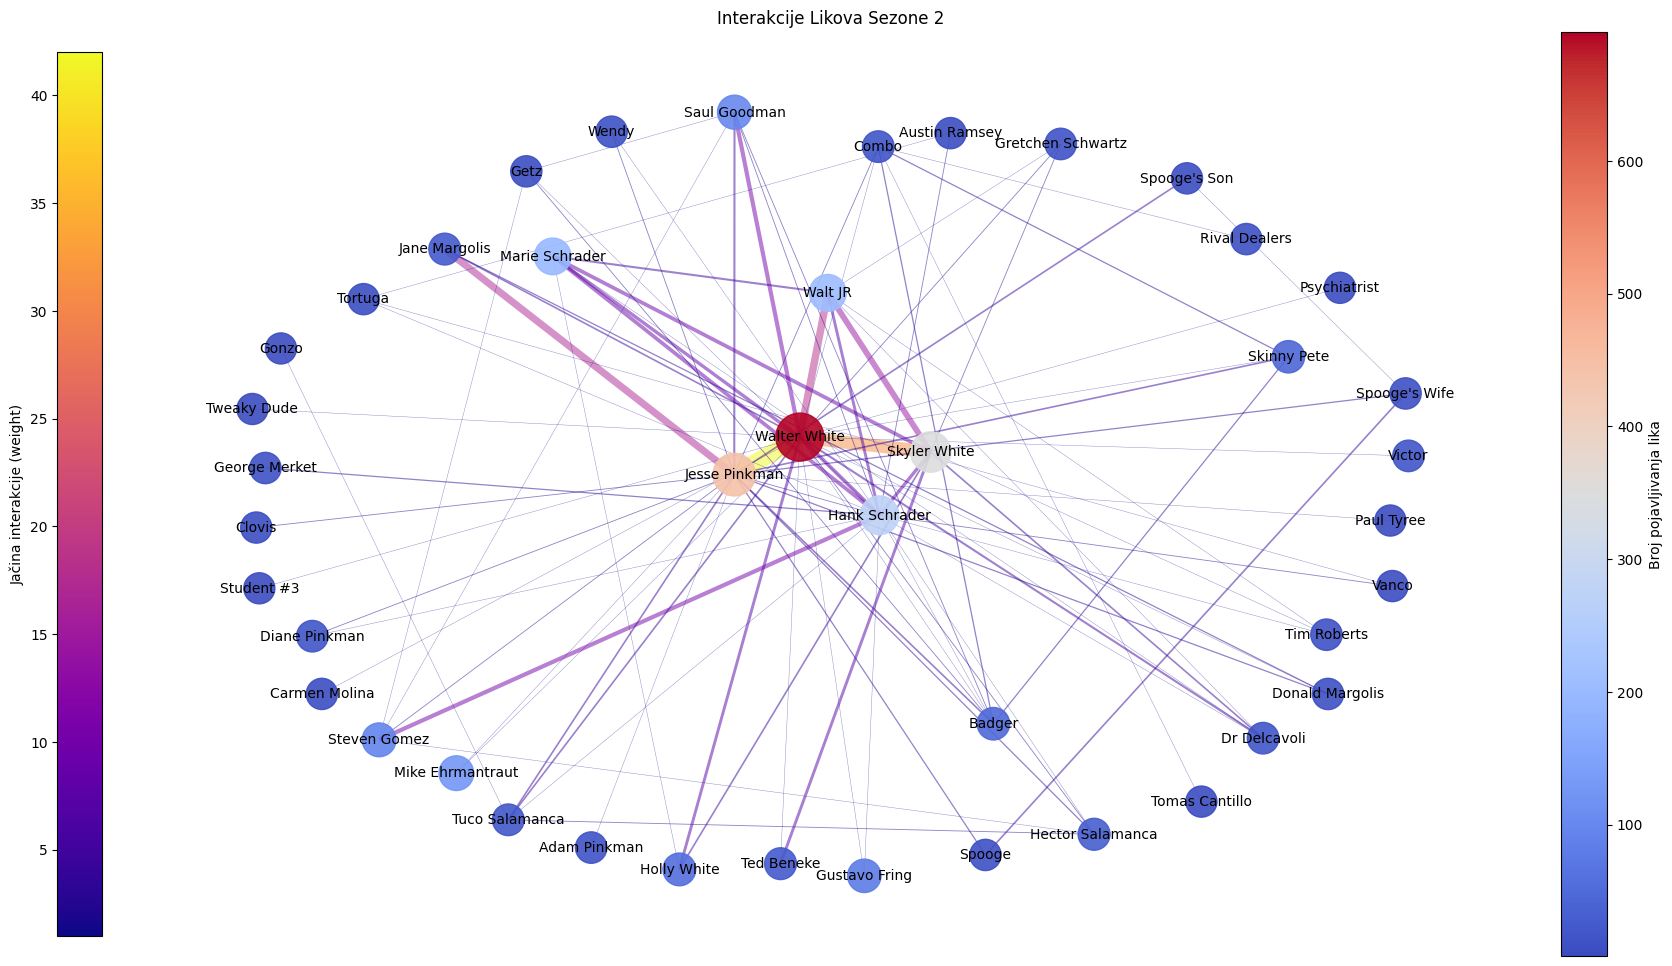

In [103]:
df_sezona_2 = data[data['Season'] == "Season 2"]
G_sezona_2 = create_graph(df_sezona_2)
plot_interactions(G_sezona_2, "Interakcije Likova Sezone 2")

Druga sezona vidno ima dosta više likova nego prva zbog povećanja broja epizoda sa 7 na 13. 

Glavnih 6 likova ostaje isto i jedina promena je da sada Walter i Jesse imaju najveću interakciju međusobno.

Dodatne promene su novi likovi poput Jane, Saula, Teda, Mike-a, Gusa i Holly, koji ostaju da menjaju grafik do kraja.

Vidno se vidi i povećanje u interakcijama između Steve-a i Hanka



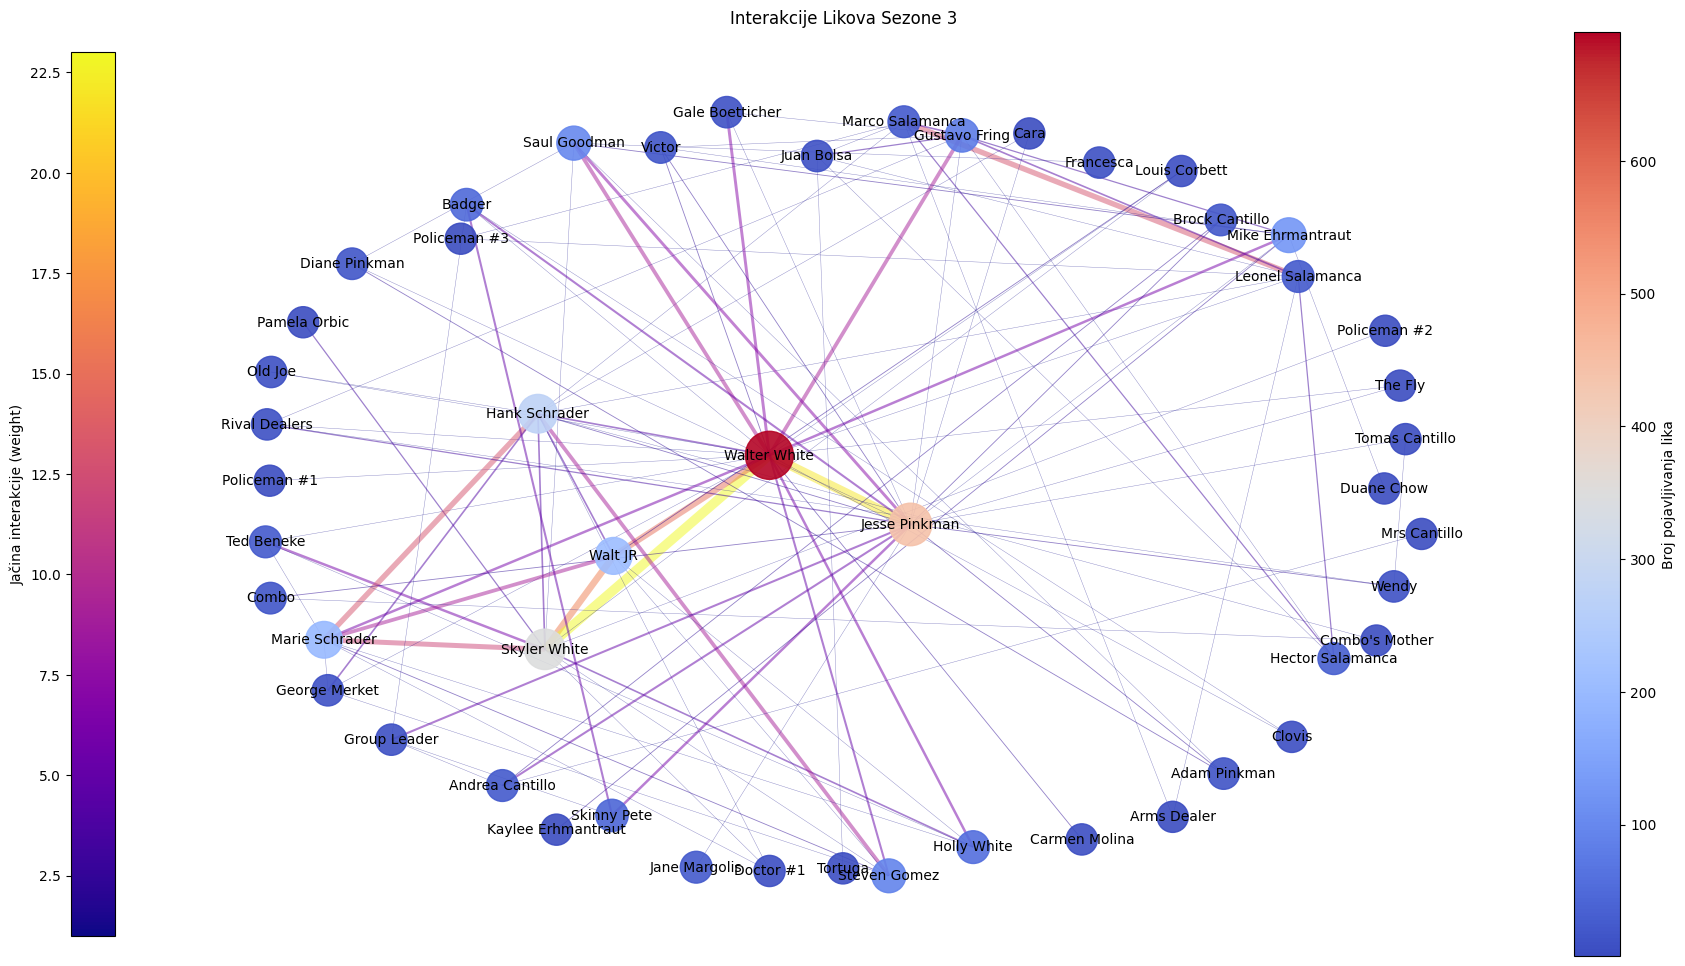

In [104]:
df_sezona_3 = data[data['Season'] == "Season 3"]
G_sezona_3 = create_graph(df_sezona_3)
plot_interactions(G_sezona_3, "Interakcije Likova Sezone 3")

Sezona 3 uviđa smanjenja u scenama sa Marie i Steve-om koji su prebačeni kompletno u dalji krug. 

Ostali likovi poput Saula, Mike-a i Gusa idalje nisu prikazana kao jedni od glavnih aktera iako je njihov uticaj mnogo veći.

Ovde ponovo vidimo povećanje odnosa između Waltera i Skyler koja sada saznaje Walterovu tajnu i mnogo češće interaguju.

Od novih likova niko značajnije nije prikazan u odnosi na druge pa tu nemamo izuzetaka.

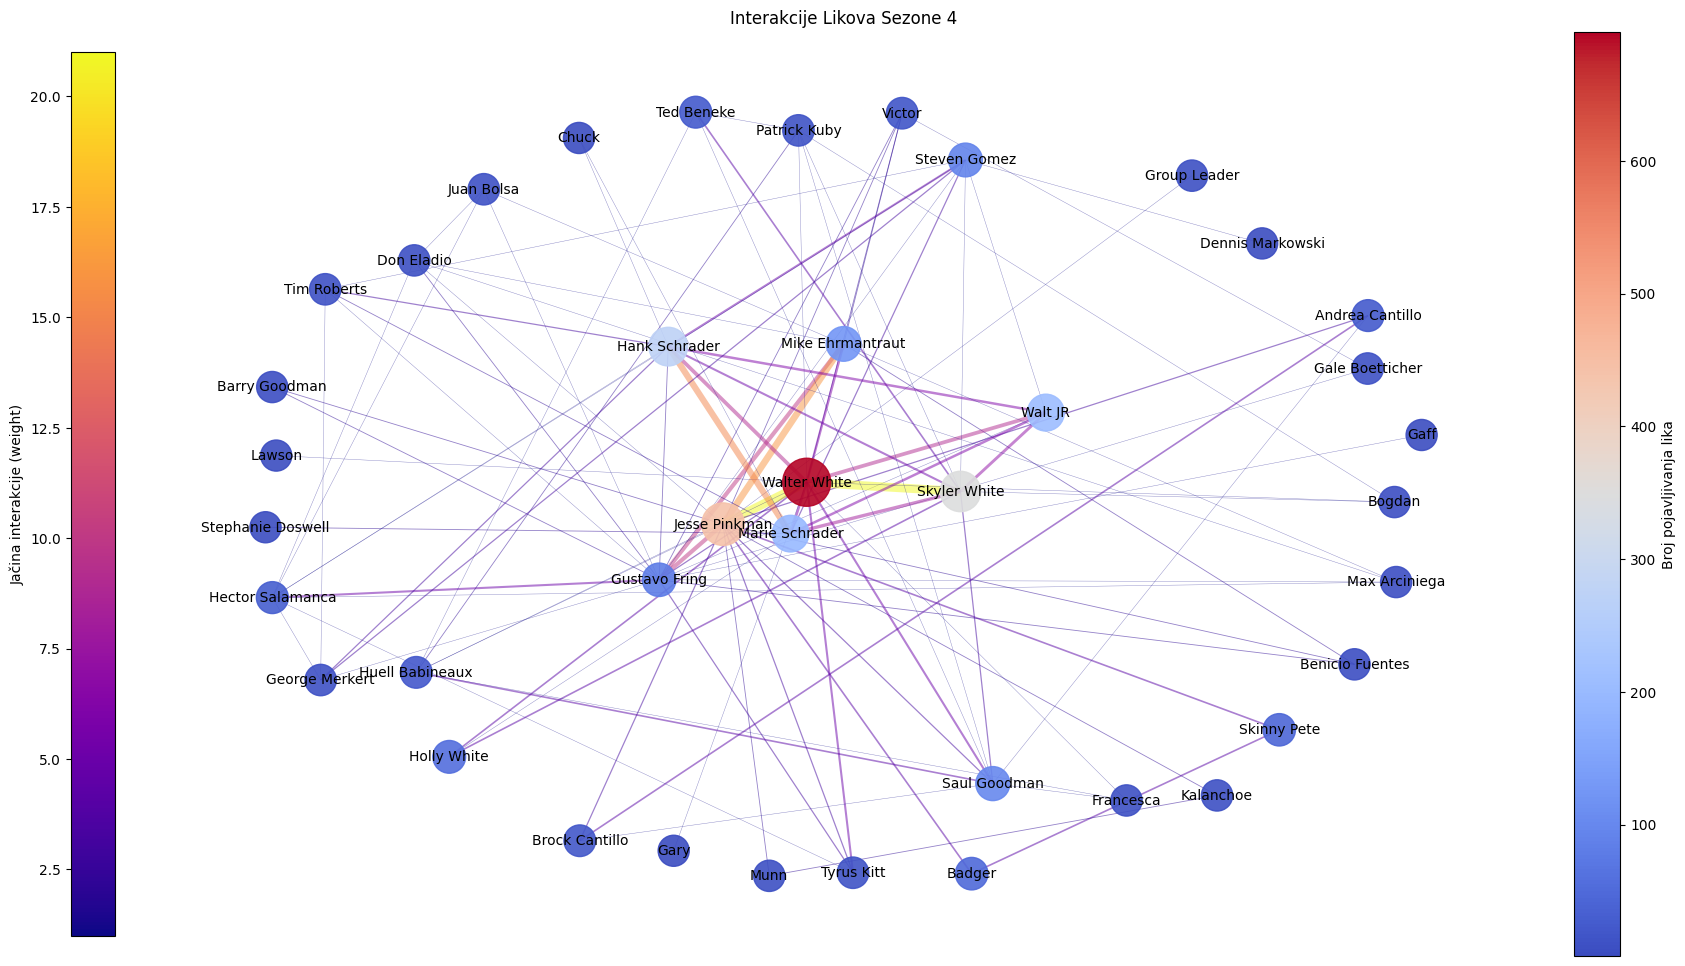

In [105]:
df_sezona_4 = data[data['Season'] == "Season 4"]
G_sezona_4 = create_graph(df_sezona_4)
plot_interactions(G_sezona_4, "Interakcije Likova Sezone 4")

Sezona četiri pokazuje mnogo bliži centar likova, što ukazuje da se glavna priča odvija između njih.

VIdimo da su Gus i Mike ušli u krug glavnih likova a da su Saul i Steve na ivici oko opisnog kruga.

Glavna tri lika ostaju idalje Walter, Jesse i Skyler sa ponovnom izmenom u najvećem broju interakcija

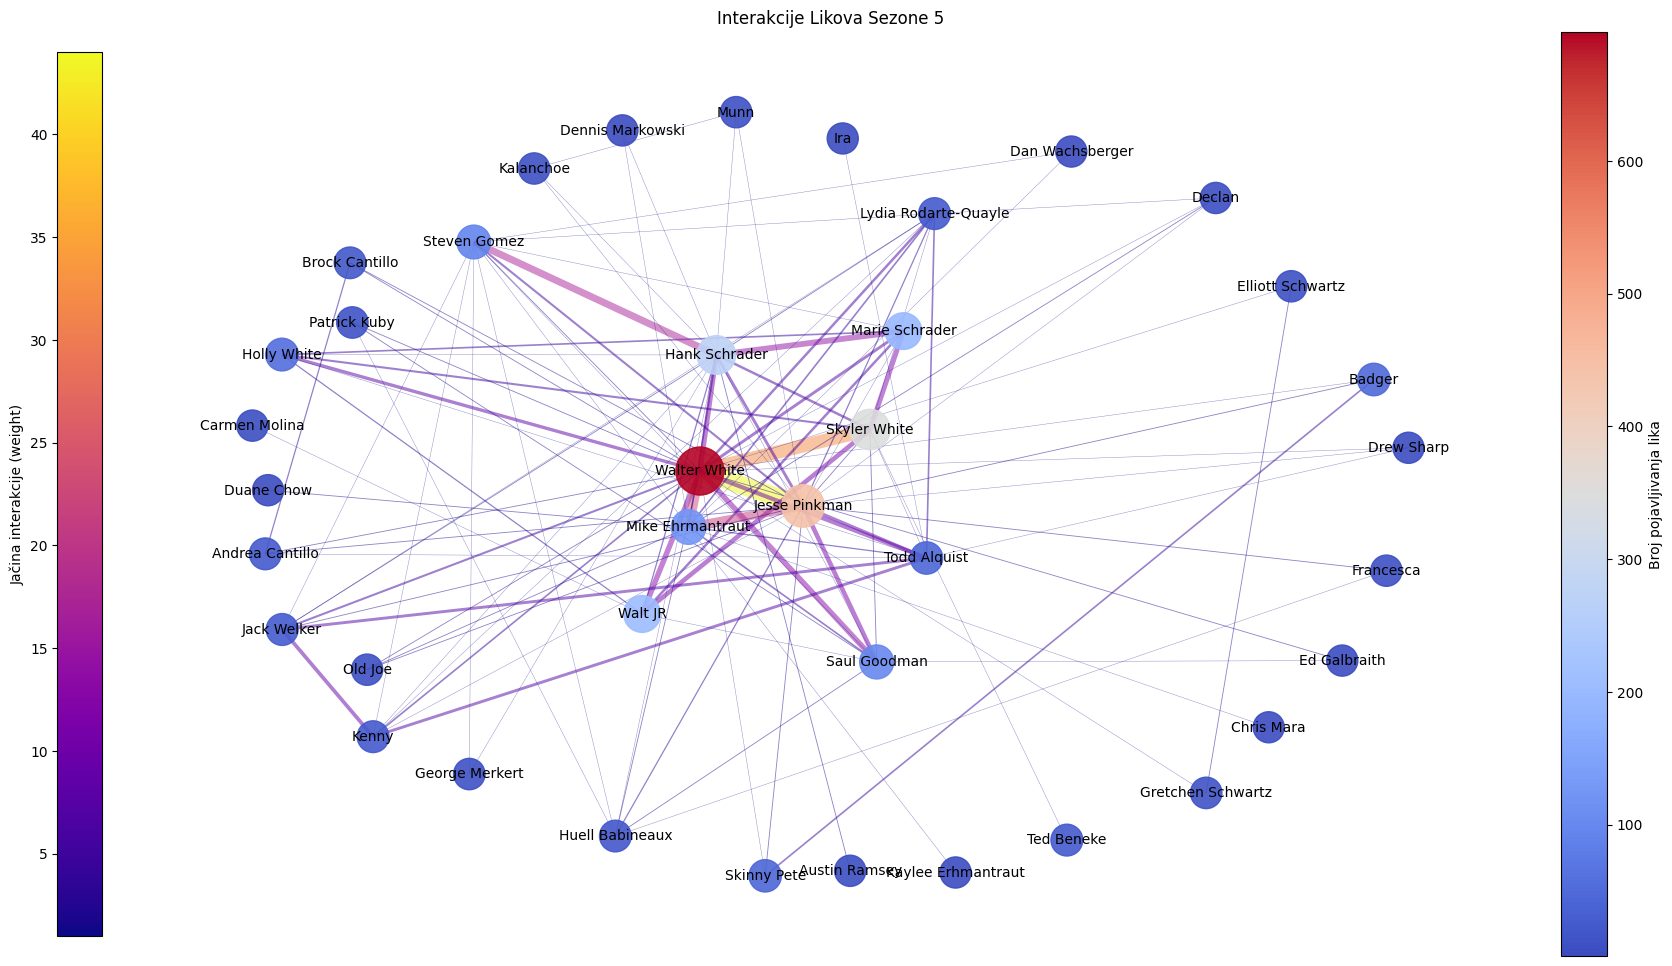

In [106]:
df_sezona_5 = data[data['Season'] == "Season 5"]
G_sezona_5 = create_graph(df_sezona_5)
plot_interactions(G_sezona_5, "Interakcije Likova Sezone 5")

Poslednja sezona ima jako isprepletani centar, jer se skoro svaka glavna scena odvija između glavnih likova, uz povećanje u broju epizoda.

U centru se sada nalaze novi likovi Todd i Lydia, uz konačan dolazak Saula koji je na ivici veći period serije.

Neki likovi poput Holly i Steve-a ostaju na ivici iako se često pominju kroz dešavanja sezone.

Može se primtetiti veliki broj interakcija između Todda, Jacka i Kenny-a koji su glavni protivnik i poslednja pretnja koja uništava život našim likovima.

In [107]:
degree_centrality = nx.degree_centrality(G_sezona_1)
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 likova po stepenu centralnosti sezone 1: ", sorted_degree[:5])

degree_centrality = nx.degree_centrality(G_sezona_2)
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 likova po stepenu centralnosti sezone 2: ", sorted_degree[:5])

degree_centrality = nx.degree_centrality(G_sezona_3)
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 likova po stepenu centralnosti sezone 3: ", sorted_degree[:5])

degree_centrality = nx.degree_centrality(G_sezona_4)
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 likova po stepenu centralnosti sezone 4: ", sorted_degree[:5])

degree_centrality = nx.degree_centrality(G_sezona_5)
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 likova po stepenu centralnosti sezone 5: ", sorted_degree[:5])

Top 5 likova po stepenu centralnosti sezone 1:  [('Walter White', 0.7857142857142857), ('Jesse Pinkman', 0.46428571428571425), ('Skyler White', 0.2857142857142857), ('Hank Schrader', 0.25), ('Walt JR', 0.17857142857142855)]
Top 5 likova po stepenu centralnosti sezone 2:  [('Walter White', 0.5714285714285714), ('Jesse Pinkman', 0.47619047619047616), ('Hank Schrader', 0.47619047619047616), ('Skyler White', 0.21428571428571427), ('Walt JR', 0.16666666666666666)]
Top 5 likova po stepenu centralnosti sezone 3:  [('Walter White', 0.47916666666666663), ('Jesse Pinkman', 0.4375), ('Hank Schrader', 0.2708333333333333), ('Skyler White', 0.25), ('Gustavo Fring', 0.20833333333333331)]
Top 5 likova po stepenu centralnosti sezone 4:  [('Gustavo Fring', 0.4615384615384615), ('Jesse Pinkman', 0.4358974358974359), ('Walter White', 0.4358974358974359), ('Skyler White', 0.2564102564102564), ('Hank Schrader', 0.2564102564102564)]
Top 5 likova po stepenu centralnosti sezone 5:  [('Walter White', 0.65789473

U stepenu centralnosti vidimo neke znatne izmene po sezonama, gde u sezoni 4 glavni lik pada na treće mesto dok prvo zauzima glavni negativac Gus.

Kroz svih 5 sezona na drugom mestu stoji Jesse dok se na trećem i četvrtom smenjuju Skyler i Hank.

U prve dve se na petom mestu nalazi Walt JR koji se često javlja na doručcima sa Walterom i Skyler. 
Dok se u petoj tu nalaze Mike i Steve koji su direktno povezani u glavnu priču serije.

In [108]:
closeness_centrality = nx.closeness_centrality(G_sezona_1)
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 likova po blizinskoj centralnosti sezone 1: ", sorted_closeness[:5])

closeness_centrality = nx.closeness_centrality(G_sezona_2)
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 likova po blizinskoj centralnosti sezone 2: ", sorted_closeness[:5])

closeness_centrality = nx.closeness_centrality(G_sezona_3)
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 likova po blizinskoj centralnosti sezone 3: ", sorted_closeness[:5])

closeness_centrality = nx.closeness_centrality(G_sezona_4)
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 likova po blizinskoj centralnosti sezone 4: ", sorted_closeness[:5])

closeness_centrality = nx.closeness_centrality(G_sezona_5)
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 likova po blizinskoj centralnosti sezone 5: ", sorted_closeness[:5])

Top 5 likova po blizinskoj centralnosti sezone 1:  [('Walter White', 0.8235294117647058), ('Jesse Pinkman', 0.6511627906976745), ('Skyler White', 0.5833333333333334), ('Skinny Pete', 0.5384615384615384), ('Tuco Salamanca', 0.5384615384615384)]
Top 5 likova po blizinskoj centralnosti sezone 2:  [('Walter White', 0.7), ('Jesse Pinkman', 0.65625), ('Hank Schrader', 0.6363636363636364), ('Badger', 0.5384615384615384), ('Tuco Salamanca', 0.5185185185185185)]
Top 5 likova po blizinskoj centralnosti sezone 3:  [('Walter White', 0.64), ('Jesse Pinkman', 0.6), ('Hank Schrader', 0.5454545454545454), ('Gustavo Fring', 0.5217391304347826), ('Mike Ehrmantraut', 0.4948453608247423)]
Top 5 likova po blizinskoj centralnosti sezone 4:  [('Gustavo Fring', 0.6290322580645161), ('Walter White', 0.6290322580645161), ('Jesse Pinkman', 0.609375), ('Hank Schrader', 0.52), ('Mike Ehrmantraut', 0.5131578947368421)]
Top 5 likova po blizinskoj centralnosti sezone 5:  [('Walter White', 0.7450980392156863), ('Jesse

Po blizinskoj centralnosti vidimo da je isti slučaj kao i kod stepena centralnosti kod prva dva mesta uz blagu izmenu u četvrtoj sezoni između Waltera i Jesse-a.

Vidimo da su u petoj sezoni glavni akteri svi koji su uključeni u glavna dešavanja a tu su od početka.

Iznenađenje prave Tuco Salamanca koji se pojavaljuje u samo dve epizode i prve i druge sezone ali interaguje sa glavnim likovima više puta.
I Skinny Pete i Badger koji se pojavljuju kao mideatori za nove likove, redom Tuca i Saula.

Vidi se izostanal Skyler koja nikad ne interaguje sa glavnim narko dilerima.



In [109]:
betweenness_centrality = nx.betweenness_centrality(G_sezona_1, normalized=True, weight='weight')
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 likova po centralnosti posrednistva sezone 1: ", sorted_betweenness[:5])

betweenness_centrality = nx.betweenness_centrality(G_sezona_2, normalized=True, weight='weight')
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 likova po centralnosti posrednistva sezone 2: ", sorted_betweenness[:5])

betweenness_centrality = nx.betweenness_centrality(G_sezona_3, normalized=True, weight='weight')
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 likova po centralnosti posrednistva sezone 3: ", sorted_betweenness[:5])

betweenness_centrality = nx.betweenness_centrality(G_sezona_4, normalized=True, weight='weight')
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 likova po centralnosti posrednistva sezone 4: ", sorted_betweenness[:5])

betweenness_centrality = nx.betweenness_centrality(G_sezona_5, normalized=True, weight='weight')
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 likova po centralnosti posrednistva sezone 5: ", sorted_betweenness[:5])

Top 5 likova po centralnosti posrednistva sezone 1:  [('Walter White', 0.5965608465608465), ('Jesse Pinkman', 0.5242504409171076), ('Krazy 8', 0.1265432098765432), ('Backhoe operator', 0.1265432098765432), ('Wendy', 0.12566137566137564)]
Top 5 likova po centralnosti posrednistva sezone 2:  [('Hank Schrader', 0.5280100658149439), ('Walter White', 0.4913859852884243), ('Jesse Pinkman', 0.2779519938056523), ('Badger', 0.13300425861401471), ('Gustavo Fring', 0.11182733255903991)]
Top 5 likova po centralnosti posrednistva sezone 3:  [('Walter White', 0.4601015218036496), ('Jesse Pinkman', 0.28672387502174734), ('Skyler White', 0.1672738658110998), ('Hank Schrader', 0.1672670857511283), ('Leonel Salamanca', 0.1427006258123279)]
Top 5 likova po centralnosti posrednistva sezone 4:  [('Jesse Pinkman', 0.3556239382150314), ('Don Eladio', 0.2175319132809011), ('Steven Gomez', 0.20413035382671008), ('Hector Salamanca', 0.20347902959238992), ('Gustavo Fring', 0.19660768456315011)]
Top 5 likova po c

Centralnost posredništva vidi promenu svake sezone na svim mestima.

Svake sezone je promenjen broj sporednih likova sa kojima glavni likovi interaguju što će menjati njihove pozicije na skali.

Pored toga i sami sporedni likovi se nalaze tu jer oni sami i predstavljaju jedini put koji može doći do njih, kao na primer Backhoe Operator i Wendy koji u prvoj sezoni interaguju samo sa Jesse-m i Walterom

In [110]:
eigen_centrality = nx.eigenvector_centrality(G_sezona_1, max_iter=1000, weight='weight')
sorted_eigen = sorted(eigen_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 likova po eigen centralnosti sezone 1: ", sorted_eigen[:5])

eigen_centrality = nx.eigenvector_centrality(G_sezona_2, max_iter=1000, weight='weight')
sorted_eigen = sorted(eigen_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 likova po eigen centralnosti sezone 2: ", sorted_eigen[:5])

eigen_centrality = nx.eigenvector_centrality(G_sezona_3, max_iter=1000, weight='weight')
sorted_eigen = sorted(eigen_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 likova po eigen centralnosti sezone 3: ", sorted_eigen[:5])

eigen_centrality = nx.eigenvector_centrality(G_sezona_4, max_iter=1000, weight='weight')
sorted_eigen = sorted(eigen_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 likova po eigen centralnosti sezone 4: ", sorted_eigen[:5])

eigen_centrality = nx.eigenvector_centrality(G_sezona_5, max_iter=1000, weight='weight')
sorted_eigen = sorted(eigen_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 likova po eigen centralnosti sezone 5: ", sorted_eigen[:5])

Top 5 likova po eigen centralnosti sezone 1:  [('Walter White', 0.6271402252801167), ('Skyler White', 0.5019052503290768), ('Jesse Pinkman', 0.3448485335496611), ('Walt JR', 0.342529124750241), ('Hank Schrader', 0.2294684835957514)]
Top 5 likova po eigen centralnosti sezone 2:  [('Walter White', 0.6318417175177923), ('Jesse Pinkman', 0.45595503784428715), ('Skyler White', 0.4036284812594358), ('Walt JR', 0.2820361445888025), ('Hank Schrader', 0.20927523142785878)]
Top 5 likova po eigen centralnosti sezone 3:  [('Walter White', 0.5738761950741598), ('Skyler White', 0.4680608623228312), ('Walt JR', 0.3745505085242767), ('Marie Schrader', 0.2951364429477881), ('Jesse Pinkman', 0.2896109340614796)]
Top 5 likova po eigen centralnosti sezone 4:  [('Walter White', 0.562342944263295), ('Jesse Pinkman', 0.41388388728978565), ('Skyler White', 0.37711269250353163), ('Hank Schrader', 0.2799135480928209), ('Marie Schrader', 0.26130585628224656)]
Top 5 likova po eigen centralnosti sezone 5:  [('Walt

Konačno eigenvector prikazuje promenu važnosti likovi i može se primetiti da to uglavnom predstavlja broj njihovih interakcije sa Walterom koji je uvek na prvom mestu. 

Na drugom se smenjuju Skyler i Jesse a ostali likovi su svi u direktnoj korelisanosti sa Walterom. Naime njegova porodica JR, Hank i Marie.

Jedini lik osim glavne porodice i Jesse-a je Mike koji se javlja na trećem mestu u petoj sezoni.